## Linear Regression Coefficients

In this notebook, we repeat the feature selection based of variable coefficients returned by a linear model. This time on a regression scenario.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

In [3]:
data = pd.read_csv('HousingPrices_train.csv')
data.shape

(1460, 81)

In [4]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [6]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [7]:
# the features in the house dataset are in different scales
# so we train a scaler to scale them

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
# we train a Linear regression model and select
# features with higher coefficients.

# the LinearRegression object from sklearn is a non-regularised
# linear method. It fits by matrix multiplication and not 
# gradient descent.

# therefore we don't need to specify penalty and other parameters

sel_ = SelectFromModel(LinearRegression())

sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LinearRegression())

In [9]:
# let's count the number of variables selected
selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

7

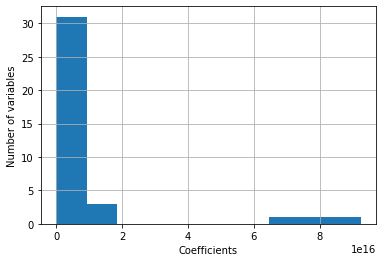

In [10]:
# and now let's plot the histogram of absolute coefficients

pd.Series(np.abs(sel_.estimator_.coef_).ravel()).hist(bins=10)
plt.xlabel('Coefficients')
plt.ylabel('Number of variables')
plt.show()

In [11]:
# and now, let's compare the  amount of selected features
# with the amount of features which coefficient is above the
# mean coefficient, to make sure we understand the output of
# sklearn

print('total features: {}'.format((X_train.shape[1])))

print('selected features: {}'.format(len(selected_feat)))

print(
    'features with coefficients greater than the mean coefficient: {}'.format(
        np.sum(
            np.abs(sel_.estimator_.coef_) > np.abs(
                sel_.estimator_.coef_).mean())))

total features: 37
selected features: 7
features with coefficients greater than the mean coefficient: 7


Same as before, it selects those features which coefficient are greater than the mean of all feature coefficients.

That is all for this lecture, I hope you enjoyed it and see you in the next one!